# IC Final Report

## This notebook contains the following topics:

### 01. Import Libraries and Files
### 02. Personally identifiable information (PII)
### 03. Regional Sementation of Data
### 04. Exclusion flag for low-activity customers
### 05. Profiling Customer
### 06. Aggregating the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.
### 07. Comparing profiles with regions
### 08. Exporting df_cop as pickle file

# 01. Import Libraries and Files

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Create folder path
path = r'C:\Users\olufunsoo\Desktop\CareerFoundry Documents'

In [3]:
# Import merged file as df_cop
df_cop = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customers_orders_products.pkl'))

In [4]:
# Checking for details of imported merged file
df_cop.head()

,user_id,First Name,Surname,Gender,STATE,Age,date_joined,number_of_dependants,family_status,income,...,prices,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_prices,spending_flag,median_prior_order,order_frequency_flag,_merge
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,9.0,Busiest day 2,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,9.0,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,9.0,Busiest day 2,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,12.6,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,12.6,Least busy 2,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both


In [5]:
df_cop.columns

Index(['user_id', 'First Name', 'Surname', 'Gender', 'STATE', 'Age',
       'date_joined', 'number_of_dependants', 'family_status', 'income',
       'order_id', 'order_number', 'order_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'product_name', 'department_id',
       'prices', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'mean_prices', 'spending_flag', 'median_prior_order',
       'order_frequency_flag', '_merge'],
      dtype='object')

# 02. Personally identifiable information (PII)

In [6]:
# Dropping columns with personally identifiable information (PII)
df_cop.drop(columns = ['First Name', 'Surname'], inplace = True)

In [7]:
# Checking outcome
df_cop.columns

Index(['user_id', 'Gender', 'STATE', 'Age', 'date_joined',
       'number_of_dependants', 'family_status', 'income', 'order_id',
       'order_number', 'order_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'product_name', 'department_id',
       'prices', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'mean_prices', 'spending_flag', 'median_prior_order',
       'order_frequency_flag', '_merge'],
      dtype='object')

# 03. Regional Sementation of Data

## Deriving new column 'Region' from 'STATE'

In [8]:
# Creating new column 'Region' from column 'State' by defining function
def state_label(row):
    if row['STATE'] in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
        return 'Northeast'
    elif (row['STATE'] in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']):
        return 'Midwest'
    elif(row['STATE'] in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']):
        return 'South'
    elif (row ['STATE'] in ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California','Hawaii']):
        return 'West'
    else: return 'Region not specified'


In [9]:
# Applying function on df_cop
df_cop['Region'] = df_cop.apply(state_label, axis = 1)

In [10]:
# Checking frequency of new column
df_cop['Region'].value_counts()

Region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

## Spending habits of customers across the different regions

In [11]:
# Crosstabing the new variable 'Region' with the column 'spending flag' to see whether there is a difference
regional_spending_habit = pd.crosstab(df_cop['Region'], df_cop['spending_flag'], dropna = False)

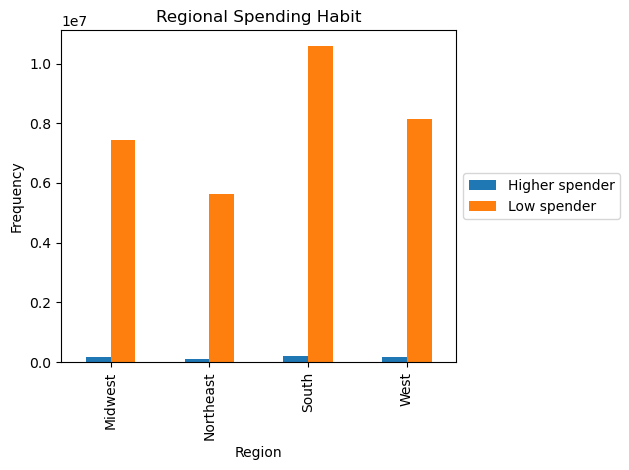

In [12]:
regional_spending_bar_chart = regional_spending_habit.plot.bar()
plt.xlabel("Region", fontsize=10)
plt.ylabel("Frequency",fontsize=10)
plt.title("Regional Spending Habit", fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()  

### The table and chart above show that there is a difference in the spending habits across the different regions in the USA, with the highest numbers of spenders, both high and low, found in the South. In all regions, however, one thing in common, which is, the customers are low spenders.

In [13]:
# Export regional_spending_bar_chart as regional_spending_habit.png
regional_spending_bar_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'regional_spending_habit.png'))

In [14]:
# Crosstabing the new variable 'loyalty_flag' with the column 'spending flag'
loyal_spending = pd.crosstab(df_cop['loyalty_flag'], df_cop['spending_flag'], dropna = False)

In [15]:
loyal_spending

spending_flag,Higher spender,Low spender
loyalty_flag,,
Loyal customer,216600,10067493
New customer,114831,6129159
Regular customer,302814,15573962


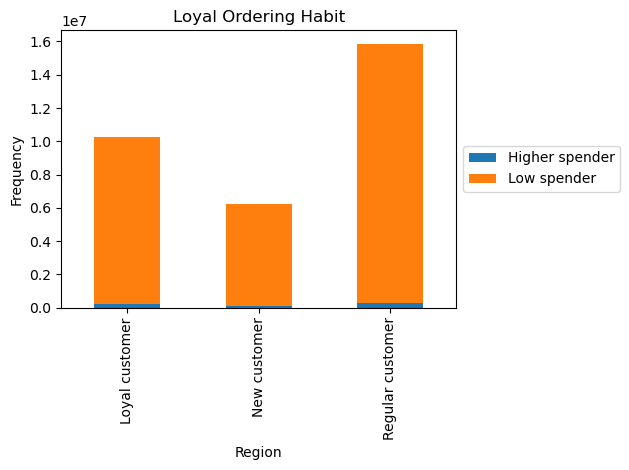

In [16]:
loyal_spending_bar = loyal_spending.plot.bar(stacked = True)
plt.xlabel("Region", fontsize=10)
plt.ylabel("Frequency",fontsize=10)
plt.title("Loyal Ordering Habit", fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()  

In [17]:
# Export loyal_spending_bar_chart as loyal_spending_habit.png
loyal_spending_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyal_spending_habit.png'))

# 04. Exclusion flag for low-activity customers

In [18]:
# Creating a subset to be exported
Low_activity_customers = df_cop.loc[df_cop['order_number'] < 5]

In [19]:
Low_activity_customers.head()

,user_id,Gender,STATE,Age,date_joined,number_of_dependants,family_status,income,order_id,order_number,...,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_prices,spending_flag,median_prior_order,order_frequency_flag,_merge,Region
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,Least busy 2,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest
5,26711,Female,Missouri,48,1/1/2017,3,married,165665,2984525,4,...,Busiest day 2,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest
9,26711,Female,Missouri,48,1/1/2017,3,married,165665,518967,1,...,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest
10,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,Least busy 2,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest


In [20]:
# Export Low_activity_customers
Low_activity_customers.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'Low_activity_customers.pkl'))

In [21]:
# Excluding the subset by dropping the subset
df_cop = df_cop.drop(df_cop[df_cop['order_number'] < 5].index)

In [22]:
Low_activity_customers.shape

(7989982, 27)

In [23]:
df_cop.shape

(24414877, 27)

# 05. Profiling Customer

### The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [24]:
# Creating customer profile based on age and family_status
df_cop.loc[(df_cop['Age'] >= 18) & (df_cop['Age'] < 40) & (df_cop['family_status'].isin (['single', 'divorced/widowed'])) & (df_cop['number_of_dependants'] > 0), 'customer_profile_1'] = 'Single young parent'
df_cop.loc[(df_cop['Age'] >= 18) & (df_cop['Age'] < 40) & (df_cop['family_status'] == 'living with parents and siblings'), 'customer_profile_1'] = 'Single young dependent'
df_cop.loc[(df_cop['Age'] >= 18) & (df_cop['Age'] < 40) & (df_cop['family_status'] == 'married') & (df_cop['number_of_dependants'] > 0), 'customer_profile_1'] = 'Married young parent'
df_cop.loc[(df_cop['Age'] >= 18) & (df_cop['Age'] < 40) & (df_cop['family_status'].isin (['single', 'divorced/widowed'])) & (df_cop['number_of_dependants'] == 0), 'customer_profile_1'] = 'Single young adult'
df_cop.loc[(df_cop['Age'] >= 18) & (df_cop['Age'] < 40) & (df_cop['family_status'] == 'married') & (df_cop['number_of_dependants'] == 0), 'customer_profile_1'] = 'Married young adult'
df_cop.loc[(df_cop['Age'] >= 40) & (df_cop['Age'] < 60) & (df_cop['family_status'].isin (['single', 'divorced/widowed'])) & (df_cop['number_of_dependants'] > 0), 'customer_profile_1'] = 'Single middle-aged parent'
df_cop.loc[(df_cop['Age'] >= 40) & (df_cop['Age'] < 60) & (df_cop['family_status'] == 'married') & (df_cop['number_of_dependants'] > 0), 'customer_profile_1'] = 'Married middle-aged parent'
df_cop.loc[(df_cop['Age'] >= 40) & (df_cop['Age'] < 60) & (df_cop['family_status'].isin (['single', 'divorced/widowed'])) & (df_cop['number_of_dependants'] == 0), 'customer_profile_1'] = 'Single middle-aged adult'
df_cop.loc[(df_cop['Age'] >= 40) & (df_cop['Age'] < 60) & (df_cop['family_status'] == 'married') & (df_cop['number_of_dependants'] == 0), 'customer_profile_1'] = 'Married middle-aged adult'
df_cop.loc[(df_cop['Age'] >= 60) & (df_cop['family_status'].isin (['single', 'divorced/widowed'])) & (df_cop['number_of_dependants'] > 0), 'customer_profile_1'] = 'Single elderly parent'
df_cop.loc[(df_cop['Age'] >= 60) & (df_cop['family_status'].isin (['single', 'divorced/widowed'])) & (df_cop['number_of_dependants'] == 0), 'customer_profile_1'] = 'Single elderly adult'
df_cop.loc[(df_cop['Age'] >= 60) & (df_cop['family_status'] == 'married') & (df_cop['number_of_dependants'] == 0), 'customer_profile_1'] = 'Married elderly adult'
df_cop.loc[(df_cop['Age'] >= 60) & (df_cop['family_status'] == 'married') & (df_cop['number_of_dependants'] > 0), 'customer_profile_1'] = 'Married elderly parent'

In [25]:
df_cop['customer_profile_1'].value_counts()

customer_profile_1
Married elderly parent        6241386
Married middle-aged parent    5741449
Married young parent          5155641
Single young adult            2091935
Single elderly adult          2089212
Single middle-aged adult      1923855
Single young dependent        1171399
Name: count, dtype: int64

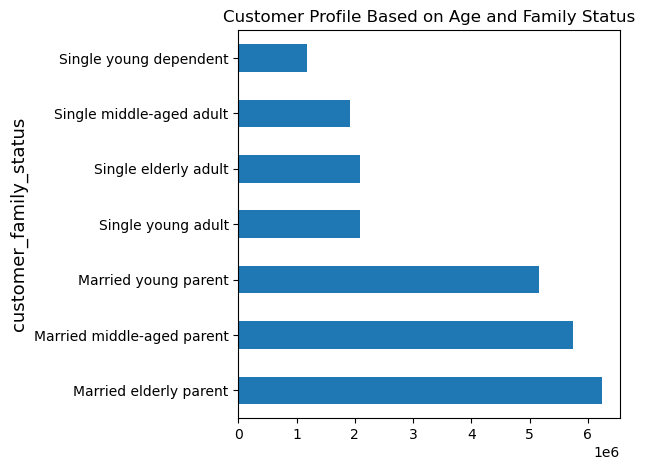

In [26]:
customer_profile_family = df_cop['customer_profile_1'].value_counts().plot.barh()
plt.title ('Customer Profile Based on Age and Family Status')
plt.ylabel ('customer_family_status', fontsize = 13)
plt.tight_layout()

### The first customer profile is based on age and family status; the family status includes marital status and number of dependants.
### The chart shows that the greater numbers of Instacart customers are family people with dependants, that is married with dependants, with the Married elderly parent group (married people above 60 having dependants, for example, children)  being the largest group. The Single young dependent group (people between 18 and 40 still living with parents/siblings) have the least number of customers.

In [27]:
# Export chart for customer_profile_family as customer_profile_family.png
customer_profile_family.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_profile_family.png'))

## Creating Profile based on Income

In [28]:
# Creating customer profile based on income
df_cop.loc[(df_cop['income'] >= 25903) & (df_cop['income'] <= 30000), 'customer_profile_income'] = 'Low-class income earner'
df_cop.loc[(df_cop['income'] > 30000) & (df_cop['income'] <= 201270), 'customer_profile_income'] = 'Middle-class income earner'
df_cop.loc[df_cop['income'] > 201270, 'customer_profile_income'] = 'High-class income earner'

In [29]:
# Checking frequency of 'customer_profile_income'
df_cop['customer_profile_income'].value_counts()

customer_profile_income
Middle-class income earner    24057932
High-class income earner        209246
Low-class income earner         147699
Name: count, dtype: int64

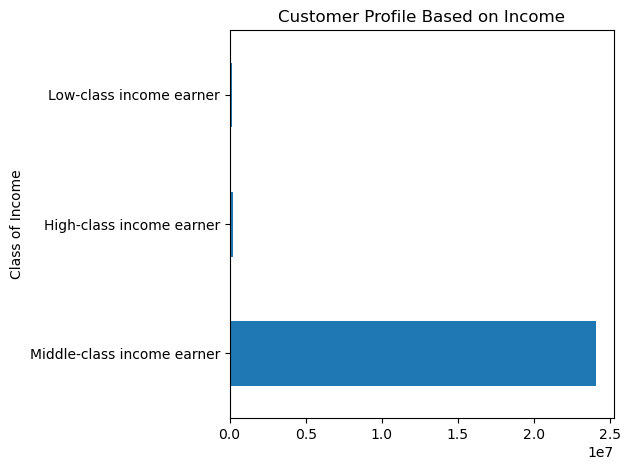

In [30]:
# Creating Chart for 'customer_profile_income'
customer_profile_income_bar = df_cop['customer_profile_income'].value_counts().plot.barh()
plt.title ('Customer Profile Based on Income')
plt.ylabel ('Class of Income')
plt.tight_layout()

### The greatest percentage of Instacart customers are middle-class earners

In [31]:
# Export chart for customer_profile_income_bar as customer_profile_income.png
customer_profile_income_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_profile_income.png'))

## Creating Profile based on goods ordered ('department_id')

In [32]:
# Creating customer profile based department_id
df_cop.loc[(df_cop['department_id'].isin ([4, 16, 19, 7, 1, 13, 3, 15, 20])) & (df_cop['customer_profile_1'].isin (['Married young parent', 'Married middle-aged parent', 'Married elderly parent'])), 'customer_profile_goods'] = 'Family most ordered goods'
df_cop.loc[(df_cop['department_id'].isin ([4, 16, 19, 7, 1, 13, 3, 15, 20])) & (df_cop['customer_profile_1'].isin (['Single young adult', 'Single middle-aged adult', 'Single elderly adult'])), 'customer_profile_goods'] = 'Individual most ordered goods'                                                                                 
df_cop.loc[(df_cop['department_id'].isin ([9, 17, 12, 14, 11, 18, 6, 5])) & (df_cop['customer_profile_1'].isin (['Married young parent', 'Married middle-aged parent', 'Married elderly parent'])), 'customer_profile_goods'] = 'Family average ordered goods'
df_cop.loc[(df_cop['department_id'].isin ([9, 17, 12, 14, 11, 18, 6, 5])) & (df_cop['customer_profile_1'].isin (['Single young adult', 'Single middle-aged adult', 'Single elderly adult'])), 'customer_profile_goods'] = 'Individual average ordered goods'                                                                             
df_cop.loc[(df_cop['department_id'].isin ([8, 21, 2, 10])) & (df_cop['customer_profile_1'].isin (['Married young parent', 'Married middle-aged parent', 'Married elderly parent'])), 'customer_profile_goods'] = 'Family Least ordered'
df_cop.loc[(df_cop['department_id'].isin ([8, 21, 2, 10])) & (df_cop['customer_profile_1'].isin (['Single young adult', 'Single middle-aged adult', 'Single elderly adult'])), 'customer_profile_goods'] = 'Individual Least ordered'                

In [33]:
# Checking frequency of 'customer_profile_goods'
df_cop['customer_profile_goods'].value_counts()

customer_profile_goods
Family most ordered goods           14765388
Individual most ordered goods        5266490
Family average ordered goods         2244556
Individual average ordered goods      792610
Family Least ordered                  128532
Individual Least ordered               45902
Name: count, dtype: int64

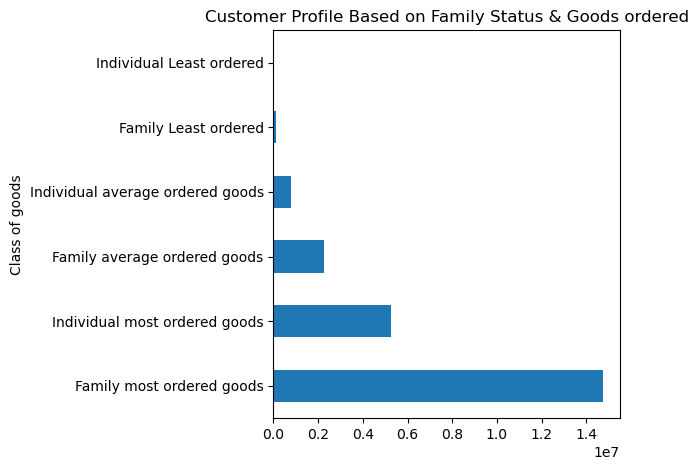

In [34]:
# Creating bar chart for 'customer_profile_goods'
cust_profile_dept_bar = df_cop['customer_profile_goods'].value_counts().plot.barh()
plt.title ('Customer Profile Based on Family Status & Goods ordered')
plt.ylabel ('Class of goods')
plt.tight_layout()

In [35]:
# Export chart for customer_profile_dept_bar as customer_profile_goods.png
cust_profile_dept_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_profile_goods.png'))

In [36]:
# importing file 'departments.csv'
df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'departments.csv'), index_col = False)

In [37]:
df_dep.head()

,department_id,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,department,frozen,other,bakery,produce,alcohol,international,beverages,pets,dry goods pasta,...,meat seafood,pantry,breakfast,canned goods,dairy eggs,household,babies,snacks,deli,missing


In [38]:
# Transposing df_dep
df_dep.T

,0
department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta


In [39]:
# Assigning a new name to transposed dataframe
df_dep_t = df_dep.T

## Merging df_cop with df_dep_t

In [41]:
df_dep_t

,0
department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta


In [42]:
# Take the first row of df_dep_t for the header
new_header = df_dep_t.iloc[0]

In [43]:
new_header

0    department
Name: department_id, dtype: object

In [44]:
# Take the data under the header row for a new df
df_dep_t_new = df_dep_t[1:]

In [45]:
df_dep_t_new

,0
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta
10,bulk


In [46]:
df_dep_t_new.columns = new_header # set the header row as the df header

In [47]:
df_dep_t_new

department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta
10,bulk


## Creating Profile based on period of day and customer's income

In [48]:
# Creating customer_profile based on busiest_period_of_day and customer_profile_income
df_cop.loc[(df_cop['busiest_period_of_day'] == 'Most orders') & (df_cop['customer_profile_income'] == 'Low-class income earner'), 'Customer_income_period'] = 'Low-class most orders'
df_cop.loc[(df_cop['busiest_period_of_day'] == 'Most orders') & (df_cop['customer_profile_income'] == 'Middle-class income earner'), 'Customer_income_period'] = 'Middle-class most orders'
df_cop.loc[(df_cop['busiest_period_of_day'] == 'Most orders') & (df_cop['customer_profile_income'] == 'High-class income earner'), 'Customer_income_period'] = 'High-class most orders'
df_cop.loc[(df_cop['busiest_period_of_day'] == 'Average orders') & (df_cop['customer_profile_income'] == 'Low-class income earner'), 'Customer_income_period'] = 'Low-class average orders'
df_cop.loc[(df_cop['busiest_period_of_day'] == 'Average orders') & (df_cop['customer_profile_income'] == 'Middle-class income earner'), 'Customer_income_period'] = 'Middle-class average orders'
df_cop.loc[(df_cop['busiest_period_of_day'] == 'Average orders') & (df_cop['customer_profile_income'] == 'High-class income earner'), 'Customer_income_period'] = 'High-class average orders'
df_cop.loc[(df_cop['busiest_period_of_day'] == 'Fewest orders') & (df_cop['customer_profile_income'] == 'Low-class income earner'), 'Customer_income_period'] = 'Low-class fewest orders'
df_cop.loc[(df_cop['busiest_period_of_day'] == 'Fewest orders') & (df_cop['customer_profile_income'] == 'Middle-class income earner'), 'Customer_income_period'] = 'Middle-class fewest orders'
df_cop.loc[(df_cop['busiest_period_of_day'] == 'Fewest orders') & (df_cop['customer_profile_income'] == 'High-class income earner'), 'Customer_income_period'] = 'High-class fewest orders'

In [49]:
# Checking for frequency of customer_income_period
df_cop['Customer_income_period'].value_counts()

Customer_income_period
Middle-class most orders       15704124
Middle-class average orders     7401099
Middle-class fewest orders       952709
High-class most orders           137056
Low-class most orders            102828
High-class average orders         63396
Low-class average orders          39293
High-class fewest orders           8794
Low-class fewest orders            5578
Name: count, dtype: int64

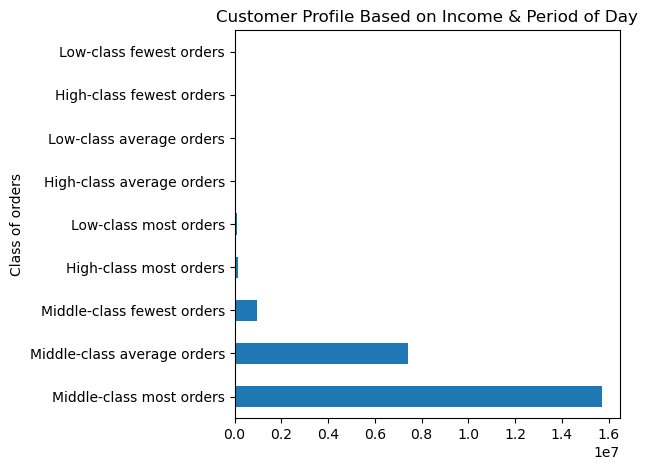

In [50]:
# Creating chart for customer_income_period
customer_income_period_bar = df_cop['Customer_income_period'].value_counts().plot.barh()
plt.title ('Customer Profile Based on Income & Period of Day')
plt.ylabel ('Class of orders')
plt.tight_layout()

In [51]:
# Export chart for customer_income_period_bar as customer_income_period.png
customer_income_period_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_income_period.png'))

# 06. Aggregating the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [52]:
# Aggregating the max, mean, and min on customer_family profile for expenditure
df_cop_fam_price = df_cop.groupby(['customer_profile_1']).agg({'prices': ['mean', 'min', 'max']})

In [53]:
df_cop_fam_price

prices              
                                 mean  min      max
customer_profile_1                                 
Married elderly parent      11.682477  1.0  99999.0
Married middle-aged parent  11.563919  1.0  99999.0
Married young parent        12.317487  1.0  99999.0
Single elderly adult        11.357794  1.0  99999.0
Single middle-aged adult    12.714372  1.0  99999.0
Single young adult          12.071620  1.0  99999.0
Single young dependent      10.699303  1.0  99999.0

In [56]:
# Aggregating the max, mean, and min on customer_family profile for frequency
df_cop_fam_freq = df_cop.groupby(['customer_profile_1']).agg({'order_number': ['mean', 'min', 'max']})

In [57]:
df_cop_fam_freq

order_number        
                                   mean min max
customer_profile_1                             
Married elderly parent        21.870894   5  99
Married middle-aged parent    21.835679   5  99
Married young parent          21.961333   5  99
Single elderly adult          22.119075   5  99
Single middle-aged adult      22.279378   5  99
Single young adult            21.913576   5  99
Single young dependent        22.102311   5  99

In [59]:
# Crosstabing  'Price' with the column 'order_frequency_flag' to see whether there is a difference
customer_spending_habit_price = pd.crosstab(df_cop['prices'], df_cop['order_frequency_flag'], dropna = False)

In [60]:
customer_spending_habit_price

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
prices,,,
1.0,62122,5556,18345
1.1,137259,10913,36222
1.2,131130,13637,41049
1.3,241729,18903,62770
1.4,223850,18520,58135
...,...,...,...
24.8,208,20,55
24.9,2876,280,1008
25.0,7293,676,2165


# 07. Comparing profiles with regions

## Customer profile based on age and family status

In [61]:
# Crosstab 'customer_profile_1' with 'Region'
regional_family_status = pd.crosstab(df_cop['customer_profile_1'], df_cop['Region'], dropna = False)

In [62]:
# Check output
regional_family_status

Region,Midwest,Northeast,South,West
customer_profile_1,,,,
Married elderly parent,1438890,1109306,2081415,1611775
Married middle-aged parent,1365644,1029434,1870233,1476138
Married young parent,1194281,906462,1739883,1315015
Single elderly adult,485162,380360,693442,530248
Single middle-aged adult,466694,316721,633230,507210
Single young adult,485105,368057,711662,527111
Single young dependent,275980,204931,399221,291267


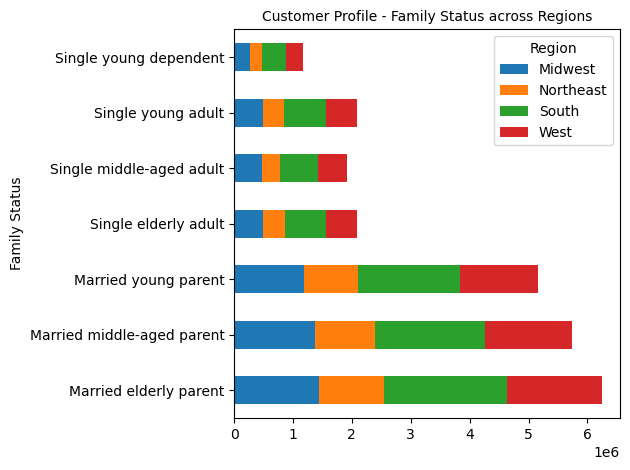

In [63]:
# Creating a bar chart to show the comparison of customer's family status across regions
regional_family_status_bar = regional_family_status.plot.barh(stacked = True)
plt.title ('Customer Profile - Family Status across Regions', fontsize = 10)
plt.ylabel ('Family Status')
plt.tight_layout()

In [64]:
# Export chart
regional_family_status_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'regional_family_status.png'))

## Customer profile based on income

In [65]:
# Crosstab 'customer_profile_income' with 'Region'
regional_customer_income = pd.crosstab(df_cop['customer_profile_income'], df_cop['Region'], dropna = False)

In [66]:
# Checking output
regional_customer_income

Region,Midwest,Northeast,South,West
customer_profile_income,,,,
High-class income earner,53816,32752,67815,54863
Low-class income earner,41631,24708,49466,31894
Middle-class income earner,5616309,4257811,8011805,6172007


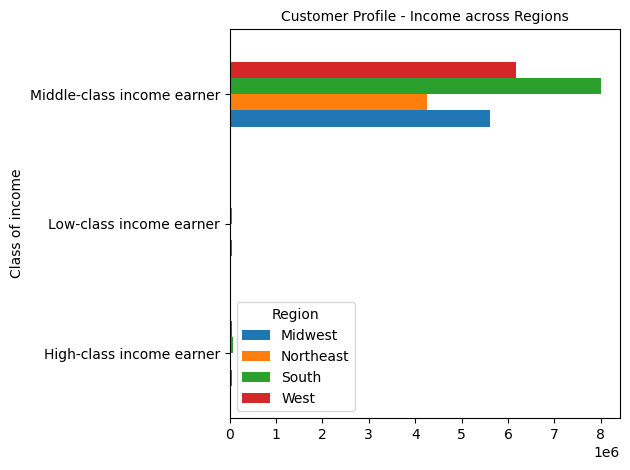

In [67]:
#Creating chart
regional_customer_income_chart = regional_customer_income.plot.barh()
plt.title ('Customer Profile - Income across Regions', fontsize = 10)
plt.ylabel ('Class of income')
plt.tight_layout()

In [68]:
# Exporting chart
regional_customer_income_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'regional_customer_income.png'))

## Customer profile based on produce (department_id)

In [69]:
# Checking relationship between department_id and customer_profile_income by crosstab
customer_produce = pd.crosstab(df_cop['department_id'], df_cop['customer_profile_income'], dropna = False)

In [70]:
# Checking output
customer_produce

customer_profile_income,High-class income earner,Low-class income earner,Middle-class income earner
department_id,,,
1,15985,9360,1602269
2,379,231,26556
3,10299,4545,868486
4,40955,35132,7151004
5,5150,883,101939
6,1667,1013,195220
7,20705,18154,1997588
8,1544,343,70224
9,5611,2910,625204


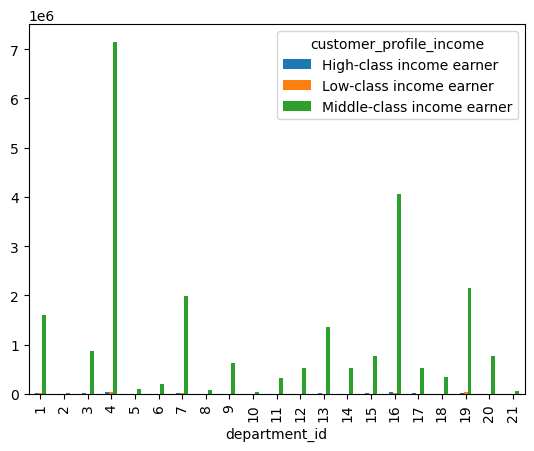

In [71]:
customer_produce = customer_produce.plot.bar()

In [72]:
# Exporting customer_produce
customer_produce.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_income_produce.png'))

In [73]:
# Crosstab 'customer_profile_goods' with 'Region'
regional_customer_produce = pd.crosstab(df_cop['customer_profile_goods'], df_cop['Region'], dropna = False)

In [74]:
# Checking output
regional_customer_produce

Region,Midwest,Northeast,South,West
customer_profile_goods,,,,
Family Least ordered,29843,23302,42697,32690
Family average ordered goods,522265,395735,747727,578829
Family most ordered goods,3446707,2626165,4901107,3791409
Individual Least ordered,10546,9074,14621,11661
Individual average ordered goods,189403,139840,262076,201291
Individual most ordered goods,1237012,916224,1761637,1351617


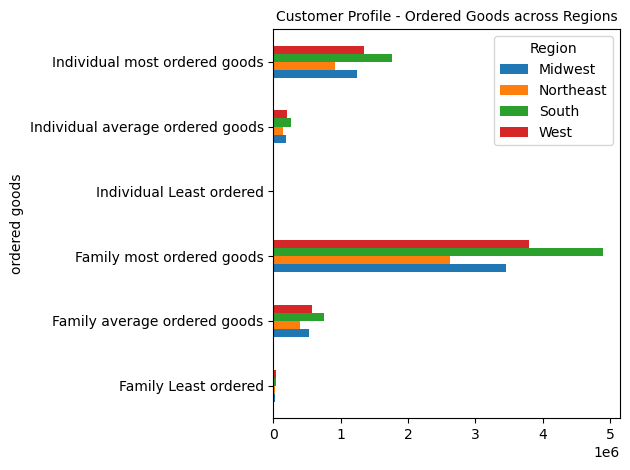

In [75]:
# Creating regional_customer_produce chart
regional_customer_produce_bar =regional_customer_produce.plot.barh()
plt.title ('Customer Profile - Ordered Goods across Regions', fontsize = 10)
plt.ylabel ('ordered goods')
plt.tight_layout()

In [76]:
# Export regional_customer_produce Chart
regional_customer_produce_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'regional_customer_produce.png'))

## Customer profile based on period of day and income

In [77]:
# Crosstab 'customer_income_period' with 'Region'
regional_customer_income_period = pd.crosstab(df_cop['Customer_income_period'], df_cop['Region'], dropna = False)

In [78]:
# Checking output
regional_customer_income_period

Region,Midwest,Northeast,South,West
Customer_income_period,,,,
High-class average orders,16492,10273,20197,16434
High-class fewest orders,1811,804,4002,2177
High-class most orders,35513,21675,43616,36252
Low-class average orders,10032,6518,14653,8090
Low-class fewest orders,1283,1055,1900,1340
Low-class most orders,30316,17135,32913,22464
Middle-class average orders,1739753,1306900,2468282,1886164
Middle-class fewest orders,221292,172062,319369,239986
Middle-class most orders,3655264,2778849,5224154,4045857


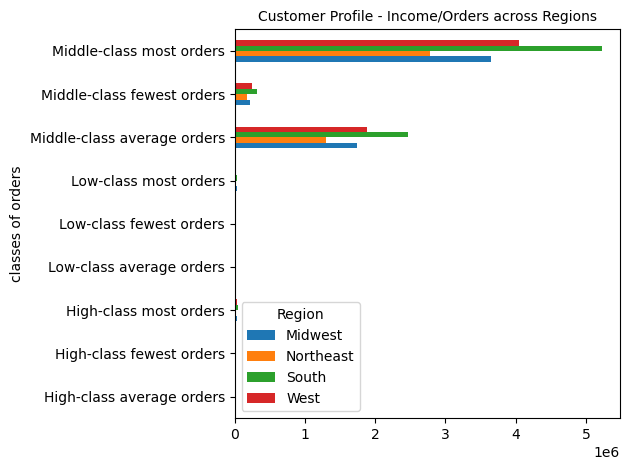

In [79]:
# Creating chart for the regional_customer_income_period
regional_customer_income_period_bar = regional_customer_income_period.plot.barh()
plt.title ('Customer Profile - Income/Orders across Regions', fontsize = 10)
plt.ylabel ('classes of orders')
plt.tight_layout()

In [80]:
# Exporting chart
regional_customer_income_period_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'regional_customer_income_period.png'))

# 08. Exporting df_cop as pickle file

In [81]:
# Export df_cop as customer_orders_products.pkl
df_cop.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customer_orders_products.pkl'))